# Introducción a Pandas
Ing. Carlos Crespo Elizondo, MSF
MF-013 Análisis de Inversión<br>
Clase del 12 de octubre 2021<br>

Maestría de Finanzas, Facultad de Economía<br>
UANL<br>

## ![](https://pandas.pydata.org/static/img/pandas.svg)

> _"pandas es una librería de Python que provee una rápida y flexible estructura de datos diseñada para trabajar con datos relacionados o etiquetados de manera fácil e intuitiva."_
>
> _"Python junto con pandas se usa en una amplia variedad áreas que incluyen finanzas, data science, neurociencia, economía, estadísticas, publicidad, análisis web y más."_<br>
> https://pandas.pydata.org

## Características de Pandas

* Rápido y eficiente para la manipulación de información a través de DataFrames

* Herramientas para leer y guardar información entre los datos generados y diferentes formatos como CSV, Excel, archivos de texto, bases de datos SQL, HDF5.

* Funcionalidad de series de tiempo.

## Estructura de datos en Pandas

Las estructuras de datos de Pandas más importante son:
1. Series:  Arreglos unidimensional que contiene una secuencia de valores y un array asociado de etiquetas para los datos, que se llama *__index__*.
2. DataFrames:  Representa una tabla rectangular que contiene una colección ordenada de columnas.  Contiene *__index__* tanto para las filas, como para las columnas.

## Cargando la librería pandas en Python

In [1]:
import pandas as pd

## Tipos de estructuras de datos en pandas

###  Serie

Podemos hacer Series utilizando listas:

In [2]:
precios = pd.Series([12.2, 13, 14, 15, 16, 17, 18])
precios

0    12.2
1    13.0
2    14.0
3    15.0
4    16.0
5    17.0
6    18.0
dtype: float64

A las series le podemos especificar index o etiquetas:

In [3]:
precios = pd.Series([12.2, 13, 14, 15], index=['08/07/21', '08/08/21', '08/09/21', '08/10/21'])
precios

08/07/21    12.2
08/08/21    13.0
08/09/21    14.0
08/10/21    15.0
dtype: float64

Asignarle index a las series nos funciona para accesar el valor por el nombre/valor del index, en este caso una fecha:

In [4]:
precios['08/07/21']

12.2

Podemos filtar por valores

In [5]:
precios[precios>13]

08/09/21    14.0
08/10/21    15.0
dtype: float64

In [6]:
precios[precios==13]

08/08/21    13.0
dtype: float64

Las operaciones con escalares son para cada elemento de la Serie:

In [7]:
precios * 10

08/07/21    122.0
08/08/21    130.0
08/09/21    140.0
08/10/21    150.0
dtype: float64

In [8]:
precios + precios

08/07/21    24.4
08/08/21    26.0
08/09/21    28.0
08/10/21    30.0
dtype: float64

In [9]:
precios-precios

08/07/21    0.0
08/08/21    0.0
08/09/21    0.0
08/10/21    0.0
dtype: float64

In [10]:
precios2 = precios * 10

Las operaciones matemáticas de dos o más series se efectúan en función al "match" entre index's, no importa su posición en la serie.  Lo único que importa en el nombre del index.

In [11]:
precios2

08/07/21    122.0
08/08/21    130.0
08/09/21    140.0
08/10/21    150.0
dtype: float64

#### Aplicar funciones de NumPy en pandas

Podemos aplicar también funciones de NumPy en pandas.

In [12]:
import numpy as np

Aplicarle logaritmo natural al df2 con `np.log`:

In [13]:
x = np.log(precios2)

In [14]:
x

08/07/21    4.804021
08/08/21    4.867534
08/09/21    4.941642
08/10/21    5.010635
dtype: float64

In [15]:
precios

08/07/21    12.2
08/08/21    13.0
08/09/21    14.0
08/10/21    15.0
dtype: float64

Convertir los valores de la serie `precios` a array de numpy:

In [16]:
array_precios = precios.values
array_precios

array([12.2, 13. , 14. , 15. ])

In [17]:
array_precios[0]

12.2

#### Crear una Serie a partir de un diccionario

In [18]:
dicc_cierre = {'btc':50000, 'xrp':.8, 'eth':3500, 'doge':.3, 'btg':500}

In [19]:
dicc_cierre

{'btc': 50000, 'xrp': 0.8, 'eth': 3500, 'doge': 0.3, 'btg': 500}

In [20]:
precios_cierre = pd.Series(dicc_cierre)
precios_cierre

btc     50000.0
xrp         0.8
eth      3500.0
doge        0.3
btg       500.0
dtype: float64

In [21]:
precios_cierre['eth']

3500.0

#### Definir orden en la Serie
Definir una lista con el órden deseado y ponerlo como index

In [22]:
orden = ['btc', 'doge', 'eth', 'xrp']
precios_cierre2 = pd.Series(dicc_cierre, index=orden)




In [23]:
precios_cierre2

btc     50000.0
doge        0.3
eth      3500.0
xrp         0.8
dtype: float64

In [24]:
precios_cierre + precios_cierre2

btc     100000.0
btg          NaN
doge         0.6
eth       7000.0
xrp          1.6
dtype: float64

### DataFrame

Podemos hacer un DataFrame (df) con un diccionario:

In [2]:
datos = {'Estados':['Coah', 'NL', 'Tam', 'SLP'], 'Poblacion':[2.9, 5.0, 3.5, 2.7],
         '#Municipios':[38, 51, 43, 58]}

In [3]:
df = pd.DataFrame(datos)
df

,Estados,Poblacion,#Municipios
0,Coah,2.9,38
1,NL,5.0,51
2,Tam,3.5,43
3,SLP,2.7,58


#### Seleccionar los valores de la columna `"Estados"`

In [27]:
df['Estados']

0    Coah
1      NL
2     Tam
3     SLP
Name: Estados, dtype: object

#### Seleccionar valores puntuales
Podemos seleccionar el valor `'NL'` haciendo referencia primero al nombre de la columna y después a su index:

In [28]:
df['Estados'][1]

'NL'

Pero *__NO__* podemos seleccionar la fila index `1` de esta misma manera:

In [29]:
df[1]

KeyError: 1

Para eso necesitamos utilizar `iloc` o `loc` que veremos más adelante.

#### Seleccionar varias columnas
Seleccionar una columna:

In [30]:
df['Poblacion']

0    2.9
1    5.0
2    3.5
3    2.7
Name: Poblacion, dtype: float64

Seleccionar dos columnas (o más):

In [31]:
df[['Estados', 'Poblacion']]

,Estados,Poblacion
0,Coah,2.9
1,NL,5.0
2,Tam,3.5
3,SLP,2.7


In [32]:
df

,Estados,Poblacion,#Municipios
0,Coah,2.9,38
1,NL,5.0,51
2,Tam,3.5,43
3,SLP,2.7,58


#### Asignar una columna nueva y un valor escalar para toda la columna

In [4]:
df['PIB'] = 23.4

In [5]:
df

,Estados,Poblacion,#Municipios,PIB
0,Coah,2.9,38,23.4
1,NL,5.0,51,23.4
2,Tam,3.5,43,23.4
3,SLP,2.7,58,23.4


#### Asignar una columna nueva y diferentes valores (utilizando la función de numpy arange)

In [7]:
import numpy as np
df['PIB'] = np.arange(4)
df

,Estados,Poblacion,#Municipios,PIB
0,Coah,2.9,38,0
1,NL,5.0,51,1
2,Tam,3.5,43,2
3,SLP,2.7,58,3


#### Egregar una serie a un DataFrame

Hacer Serie `pobreza`

#### SOLUCIóN PROPUESTA POR BRENDA Y DANIEL:

In [8]:
pobreza = pd.Series([.03, .02, .01], index=[1, 2, 3])

In [9]:
pobreza

1    0.03
2    0.02
3    0.01
dtype: float64

In [10]:
df['IndicePobreza'] = pobreza
df

,Estados,Poblacion,#Municipios,PIB,IndicePobreza
0,Coah,2.9,38,0,NaN
1,NL,5.0,51,1,0.03
2,Tam,3.5,43,2,0.02
3,SLP,2.7,58,3,0.01


#### LO QUE YO INTENTABA HACER:

In [11]:
pobreza = pd.Series([.03, .02, .01], index=['NL', 'Tam', 'SLP'])

In [12]:
df['IndicePobreza'] = pobreza
df

,Estados,Poblacion,#Municipios,PIB,IndicePobreza
0,Coah,2.9,38,0,NaN
1,NL,5.0,51,1,NaN
2,Tam,3.5,43,2,NaN
3,SLP,2.7,58,3,NaN


Al no tener los Estados como index, Panda no encontraba los index 'NL', 'Tam' y 'SLP' y por eso asignaba `NaN` a los index del `0` al `3`

# HASTA AQUí TERMINAMOS LA CLASE

#### Que es lo que tenemos que hacer?  Cambiar los estados a index

In [13]:
df.set_index('Estados', inplace=True)
df

,Poblacion,#Municipios,PIB,IndicePobreza
Estados,,,,
Coah,2.9,38,0,NaN
NL,5.0,51,1,NaN
Tam,3.5,43,2,NaN
SLP,2.7,58,3,NaN


In [14]:
df['IndicePobreza'] = pobreza

In [16]:
pobreza

NL     0.03
Tam    0.02
SLP    0.01
dtype: float64

In [15]:
df

,Poblacion,#Municipios,PIB,IndicePobreza
Estados,,,,
Coah,2.9,38,0,NaN
NL,5.0,51,1,0.03
Tam,3.5,43,2,0.02
SLP,2.7,58,3,0.01


### Comparando valores

In [17]:
df['MuchosMunicipios'] = df['#Municipios'] >= 45
df

,Poblacion,#Municipios,PIB,IndicePobreza,MuchosMunicipios
Estados,,,,,
Coah,2.9,38,0,NaN,False
NL,5.0,51,1,0.03,True
Tam,3.5,43,2,0.02,False
SLP,2.7,58,3,0.01,True


### Una manera de borrar columnas

In [18]:
del df['MuchosMunicipios']
df

,Poblacion,#Municipios,PIB,IndicePobreza
Estados,,,,
Coah,2.9,38,0,NaN
NL,5.0,51,1,0.03
Tam,3.5,43,2,0.02
SLP,2.7,58,3,0.01


## Trabajando con DataFrame's

In [32]:
ingresos_anuales = {'Cemex':{"'17":95,"'18":100, "'19":110, "'20":100},
                    'Femsa':{"'18":200, "'19":280, "'20":290},
                    'Alfa':{"'18":300, "'19":230, "'20": 200}
                   }

In [33]:
ingresos_anuales

{'Cemex': {"'17": 95, "'18": 100, "'19": 110, "'20": 100},
 'Femsa': {"'18": 200, "'19": 280, "'20": 290},
 'Alfa': {"'18": 300, "'19": 230, "'20": 200}}

In [34]:
df = pd.DataFrame(ingresos_anuales)
df

,Cemex,Femsa,Alfa
'17,95,NaN,NaN
'18,100,200.0,300.0
'19,110,280.0,230.0
'20,100,290.0,200.0


In [29]:
df.T

,'17,'18,'19,'20
Cemex,95.0,100.0,110.0,100.0
Femsa,NaN,200.0,280.0,290.0
Alfa,NaN,300.0,230.0,200.0


In [30]:
df.values

array([[ 95.,  nan,  nan],
       [100., 200., 300.],
       [110., 280., 230.],
       [100., 290., 200.]])

### Formas para construir desde cero un DataFrame

<table>
  <tr>
      <th><center>Tipo</center></th>
      <th><center>Comentario</center></th>
    
  </tr>
  <tr>
    <td style="text-align:left;">ndarryas de 2D.</td>
    <td style="text-align:left;">Una matriz de datos.</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">Diccionario de arrays, listas o tuplas.</td>
    <td style="text-align:left;">Cada secuencia se vuelve una columna en el DataFrame.  Todas las secuencias deben de ser de la misma longitud.</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">Numpy.</td>
    <td style="text-align:left;">pandas lo trata como un diccionario de arrays.</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">Diccionario de Series.</td>
    <td style="text-align:left;">Cada valor se vuelve una columna.  Los index de cada Serie son unidos para formar el index del DataFrame.</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">Diccionario de diccionario</td>
    <td style="text-align:left;">Cada diccionario interno se vuelve una columna y sus llaves se vuelven el index.  La llave exterior de los diccionarios se vuelven los titulos de las columnas.</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">Lista de diccionarios o Series.</td>
    <td style="text-align:left;">Cada elemento se convierte en una fila del DataFrame.  La unión de las llaves de los diccionarios o el index de las Series, se vuelven los titulos de las columnas.</td>
  </tr>
  
<tr>
    <td style="text-align:left;">Lista de listas.</td>
    <td style="text-align:left;">Se trata al igual que los ndarrays de 2D.</td>
  </tr>

<tr>
    <td style="text-align:left;">Otro DataFrame</td>
    <td style="text-align:left;">Se utilizan los index del DataFrame original, al menos que se indiquen otros.</td>
  </tr>

</table>

### Método "drop"

#### "drop" momentaneo

In [38]:
df.drop(['Cemex'], axis = 1)

,Femsa,Alfa
'17,NaN,NaN
'18,200.0,300.0
'19,280.0,230.0
'20,290.0,200.0


In [39]:
df

,Cemex,Femsa,Alfa
'17,95,NaN,NaN
'18,100,200.0,300.0
'19,110,280.0,230.0
'20,100,290.0,200.0


In [40]:
df.drop(["'17"])

,Cemex,Femsa,Alfa
'18,100,200.0,300.0
'19,110,280.0,230.0
'20,100,290.0,200.0


#### "drop" permanente

In [ ]:
df = df.drop(["'17"])

### Atributo "inplace"

In [41]:
df.drop(["'17"], inplace = True)
df

,Cemex,Femsa,Alfa
'18,100,200.0,300.0
'19,110,280.0,230.0
'20,100,290.0,200.0


### Indexing

#### Indexing en series

In [42]:
pobreza

NL     0.03
Tam    0.02
SLP    0.01
dtype: float64

In [43]:
pobreza['NL']

0.03

In [44]:
pobreza[0]

0.03

#### Indexing en DataFrames

In [45]:
df['Cemex']

'18    100
'19    110
'20    100
Name: Cemex, dtype: int64

In [46]:
df[['Cemex','Femsa']]

,Cemex,Femsa
'18,100,200.0
'19,110,280.0
'20,100,290.0


In [47]:
df

,Cemex,Femsa,Alfa
'18,100,200.0,300.0
'19,110,280.0,230.0
'20,100,290.0,200.0


### Slicing index con "iloc" y "loc"

*__iloc__* y *__loc__* están diseñados para hacer slicing en los *__index__* de los DataFrame's.  Nos permiten seleccionar un subset de **indexes** y también **columnas**.
* *__loc__* lo utilizamos si queremos seleccionar con las **etiquetas** del index o columna
* *__iloc__* lo utilizamos si queremos seleccionar con la **posición númerica** del index o columna.

In [53]:
df.loc["'18"]

Cemex    100.0
Femsa    200.0
Alfa     300.0
Name: '18, dtype: float64

In [54]:
df.iloc[0]

Cemex    100.0
Femsa    200.0
Alfa     300.0
Name: '18, dtype: float64

### Operaciones artiméticas y alineación de datos

In [56]:
df + df

,Cemex,Femsa,Alfa
'18,200,400.0,600.0
'19,220,560.0,460.0
'20,200,580.0,400.0


## Estadísticas descriptivas


<table>
  <tr>
    <th style="text-align:center;">Método</th>
    <th style="text-align:center;">Descripción</th>
  </tr>
  
  <tr>
    <td style="text-align:left;">count</td>
    <td style="text-align:left;">El número de valores que no sean NaN</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">describe</td>
    <td style="text-align:left;">Calcula un resumen de varias estadísticas por columna </td>
  </tr>
  
  <tr>
    <td style="text-align:left;">min</td>
    <td style="text-align:left;">Valor mínimo</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">max</td>
    <td style="text-align:left;">Valor máximo</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">idxmin</td>
    <td style="text-align:left;">Encuentra el valor del index en donde está el valor mínimo</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">idxmax</td>
    <td style="text-align:left;">Encuentra el valor del index en donde está el valor máximo</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">quantile</td>
    <td style="text-align:left;">Valor cuantil</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">sum</td>
    <td style="text-align:left;">Suma los valores</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">mean</td>
    <td style="text-align:left;">Media de los valores</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">median</td>
    <td style="text-align:left;">Media de los valores</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">prod</td>
    <td style="text-align:left;">Multiplica todos los valores</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">var</td>
        <td style="text-align:left;">Varianza de la muestra de los valores</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">std</td>
    <td style="text-align:left;">Desviación estándar de la muestra de los valores</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">skew</td>
    <td style="text-align:left;">Asimetría de la muestra de los valores</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">kurt</td>
    <td style="text-align:left;">Kurtosis de la muestra de los valores</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">cumsum</td>
    <td style="text-align:left;">Suma acomulada de los valores</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">cumprod</td>
    <td style="text-align:left;">Producto acomulado de los valores</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">pct_change</td>
    <td style="text-align:left;">Porcentaje de cambio</td>
  </tr>



</table>

In [57]:
df.sum()

Cemex    310.0
Femsa    770.0
Alfa     730.0
dtype: float64

In [58]:
df.mean()

Cemex    103.333333
Femsa    256.666667
Alfa     243.333333
dtype: float64

In [60]:
femsa = df['Femsa'].mean()

In [61]:
femsa

256.6666666666667

In [62]:
df[['Cemex', 'Femsa']].max()

Cemex    110.0
Femsa    290.0
dtype: float64

In [63]:
df.idxmin()

Cemex    '18
Femsa    '18
Alfa     '20
dtype: object

## Series de tiempo

*__DateTime__* tiene por lo menos tres módulos:
1. datetime
1. date
1. calendar

In [64]:
from datetime import datetime

In [67]:
ahora = datetime.now()

In [68]:
ahora

datetime.datetime(2021, 10, 19, 20, 46, 40, 857785)

In [70]:
ahora.year

2021

In [71]:
ahora.month

10

In [72]:
ahora.day

19

In [73]:
datetime(2021,10,1)

datetime.datetime(2021, 10, 1, 0, 0)

In [76]:
cambio = datetime(2021,10,1) - datetime(2020,9,1)

In [77]:
cambio

datetime.timedelta(days=395)

In [91]:
rango_fechas = pd.date_range('2010/01/01', '2021/10/19', freq = 'D')

In [92]:
rango_fechas

DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2021-10-10', '2021-10-11', '2021-10-12', '2021-10-13',
               '2021-10-14', '2021-10-15', '2021-10-16', '2021-10-17',
               '2021-10-18', '2021-10-19'],
              dtype='datetime64[ns]', length=4310, freq='D')

Estos son algunas de las frecuencias de mayor utilidad:
<table>
  <tr>
    <th style="text-align:center;">Alias</th>
    <th style="text-align:center;">Tipo</th>
    <th style="text-align:center;">Descripción</th>
  </tr>
  
  <tr>
    <td style="text-align:center;">D</td>
    <td style="text-align:left;">Día</td>
    <td style="text-align:left;">Día calendario</td>
  </tr>
  
  <tr>
    <td style="text-align:center;">B</td>
    <td style="text-align:left;">Dia laborables</td>
    <td style="text-align:left;">Dias laborales diarios</td>
  </tr>
  
  <tr>
    <td style="text-align:center;">H</td>
    <td style="text-align:left;">Hora</td>
    <td style="text-align:left;">Por hora</td>
  </tr>
  
  <tr>
    <td style="text-align:center;">T</td>
    <td style="text-align:left;">minuto</td>
    <td style="text-align:left;">Por minuto</td>
  </tr>
  
  <tr>
    <td style="text-align:center;">S</td>
    <td style="text-align:left;">Segundos</td>
    <td style="text-align:left;">Por segundo</td>
  </tr>
  
  <tr>
    <td style="text-align:center;">M</td>
    <td style="text-align:left;">Fin de mes</td>
    <td style="text-align:left;">Último día calendario del mes</td>
  </tr>
  
  <tr>
    <td style="text-align:center;">BM</td>
    <td style="text-align:left;"></td>
    <td style="text-align:left;">Último día laboral del mes</td>
  </tr>
  
  <tr>
    <td style="text-align:center;">MS</td>
    <td style="text-align:left;"></td>
    <td style="text-align:left;">Primer día calendario del mes</td>
  </tr>
  
  <tr>
    <td style="text-align:center;">BMS</td>
    <td style="text-align:left;"></td>
    <td style="text-align:left;">Primer día laboral entre semana</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">W-MON, W-TUE,...</td>
    <td style="text-align:left;">Semana</td>
    <td style="text-align:left;">Semanal en el día dado (MON, TUE, WED, THU, FRI, SAT, SUN</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">BQ-JAN, BQ-FEB...</td>
    <td style="text-align:left;">Trimestres</td>
    <td style="text-align:left;">Trimestral a partir del último día laboral del mes seleccionado</td>
  </tr>
  
</table>

## Leer datos externos

<table>
  <tr>
    <th style="text-align:center;">Función</th>
    <th style="text-align:center;">Descripción</th>
  </tr>
  
  <tr>
    <td style="text-align:left;">read_csv</td>
    <td style="text-align:left;">Lee archivos delimitados de un directorio, URL.  El delimitador por default es ","</td>
  </tr>
  
  <tr>
  
  <tr>
    <td style="text-align:left;">read_table</td>
    <td style="text-align:left;">Lee archivos delimitados de un directorio, URL.  El delimitador por default es "-TAB-"</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">read_fwf</td>
    <td style="text-align:left;">Lee archivos con datos con anchos de columna fijos, no delimitados</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">read_clipboard</td>
    <td style="text-align:left;">Similar a read_table, pero lee lo que tienes copiado en el clipboard!</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">read_excel</td>
    <td style="text-align:left;">Lee datos tabulares en XLS o XLSX</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">read_html</td>
    <td style="text-align:left;">Lee todas las tablas HTML de una dirección web</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">read_json</td>
    <td style="text-align:left;">Lee datos de archivos JSON</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">read_sas</td>
    <td style="text-align:left;">Lee datos de archivos SAS</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">read_sql</td>
    <td style="text-align:left;">Lee datos de la BD SQL</td>
  </tr>
  
  <tr>
    <td style="text-align:left;">read_stat</td>
    <td style="text-align:left;">Lee datos de archivos STAT</td>
  </tr>

## Datos históricos del Baseball 1871-2021 (bateo)

> "*The game breaks your heart. It is designed to break your heart. The game begins in spring, when everything else begins again, and it blossoms in the summer, filling the afternoons and evenings, and then as soon as the chill rains come, it stops and leaves you to face the fall alone.”.-* Bartlett Giamatti<br><br>
>"*A baseball game has six minutes of action crammed into two-and-one-half hours.*".- Ray Fitzgerald 

In [93]:
url = 'https://github.com/chadwickbureau/baseballdatabank/raw/master/core/Batting.csv'

In [94]:
mlb = pd.read_csv(url)

In [95]:
mlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108789 entries, 0 to 108788
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  108789 non-null  object 
 1   yearID    108789 non-null  int64  
 2   stint     108789 non-null  int64  
 3   teamID    108789 non-null  object 
 4   lgID      108052 non-null  object 
 5   G         108789 non-null  int64  
 6   AB        108789 non-null  int64  
 7   R         108789 non-null  int64  
 8   H         108789 non-null  int64  
 9   2B        108789 non-null  int64  
 10  3B        108789 non-null  int64  
 11  HR        108789 non-null  int64  
 12  RBI       108033 non-null  float64
 13  SB        106421 non-null  float64
 14  CS        85248 non-null   float64
 15  BB        108789 non-null  int64  
 16  SO        106689 non-null  float64
 17  IBB       72139 non-null   float64
 18  HBP       105973 non-null  float64
 19  SH        102721 non-null  float64
 20  SF  

In [96]:
mlb

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108784,zimmebr02,2020,1,BAL,AL,2,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108785,zimmejo02,2020,1,DET,AL,3,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108786,zimmeky01,2020,1,KCA,AL,16,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108787,zuberty01,2020,1,KCA,AL,23,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
mlb.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [102]:
mlb.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [103]:
mlb.tail()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
108784,zimmebr02,2020,1,BAL,AL,2,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108785,zimmejo02,2020,1,DET,AL,3,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108786,zimmeky01,2020,1,KCA,AL,16,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108787,zuberty01,2020,1,KCA,AL,23,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108788,zuninmi01,2020,1,TBA,AL,28,75,8,11,4,...,10.0,0.0,0.0,6,37.0,0.0,3.0,0.0,0.0,0.0


In [104]:
mlb.tail(10)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
108779,ynoahu01,2020,1,ATL,NL,9,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108780,youngal01,2020,1,ARI,NL,15,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108781,youngan02,2020,1,ARI,NL,12,26,3,5,2,...,4.0,0.0,0.0,5,10.0,0.0,3.0,0.0,0.0,0.0
108782,zeuchtj01,2020,1,TOR,AL,3,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108783,zimmebr01,2020,1,CLE,AL,20,37,3,6,0,...,3.0,2.0,1.0,7,14.0,0.0,5.0,0.0,1.0,2.0
108784,zimmebr02,2020,1,BAL,AL,2,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108785,zimmejo02,2020,1,DET,AL,3,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108786,zimmeky01,2020,1,KCA,AL,16,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108787,zuberty01,2020,1,KCA,AL,23,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
108788,zuninmi01,2020,1,TBA,AL,28,75,8,11,4,...,10.0,0.0,0.0,6,37.0,0.0,3.0,0.0,0.0,0.0


In [105]:
mlb['HR'].max()

73

In [106]:
mlb['HR'].idxmax()

80767

In [107]:
mlb.iloc[80767]

playerID    bondsba01
yearID           2001
stint               1
teamID            SFN
lgID               NL
G                 153
AB                476
R                 129
H                 156
2B                 32
3B                  2
HR                 73
RBI             137.0
SB               13.0
CS                3.0
BB                177
SO               93.0
IBB              35.0
HBP               9.0
SH                0.0
SF                2.0
GIDP              5.0
Name: 80767, dtype: object

In [108]:
mlb.iloc[mlb['HR'].idxmax()]

playerID    bondsba01
yearID           2001
stint               1
teamID            SFN
lgID               NL
G                 153
AB                476
R                 129
H                 156
2B                 32
3B                  2
HR                 73
RBI             137.0
SB               13.0
CS                3.0
BB                177
SO               93.0
IBB              35.0
HBP               9.0
SH                0.0
SF                2.0
GIDP              5.0
Name: 80767, dtype: object

In [109]:
maximo = mlb['HR'].idxmax()
mlb.iloc[maximo]

playerID    bondsba01
yearID           2001
stint               1
teamID            SFN
lgID               NL
G                 153
AB                476
R                 129
H                 156
2B                 32
3B                  2
HR                 73
RBI             137.0
SB               13.0
CS                3.0
BB                177
SO               93.0
IBB              35.0
HBP               9.0
SH                0.0
SF                2.0
GIDP              5.0
Name: 80767, dtype: object

$$TBHR=\frac{TurnosBat}{HR's}$$

In [110]:
mlb['TBHR'] = mlb['AB'] / mlb['HR']
mlb

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,TBHR
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,inf
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0,inf
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0,inf
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0,66.50
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108784,zimmebr02,2020,1,BAL,AL,2,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
108785,zimmejo02,2020,1,DET,AL,3,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
108786,zimmeky01,2020,1,KCA,AL,16,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
108787,zuberty01,2020,1,KCA,AL,23,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [111]:
mlb['TBHR'].min()

1.0

In [112]:
mlb2 = mlb[mlb['AB']>=300]

In [113]:
mlb2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21834 entries, 281 to 107415
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  21834 non-null  object 
 1   yearID    21834 non-null  int64  
 2   stint     21834 non-null  int64  
 3   teamID    21834 non-null  object 
 4   lgID      21789 non-null  object 
 5   G         21834 non-null  int64  
 6   AB        21834 non-null  int64  
 7   R         21834 non-null  int64  
 8   H         21834 non-null  int64  
 9   2B        21834 non-null  int64  
 10  3B        21834 non-null  int64  
 11  HR        21834 non-null  int64  
 12  RBI       21715 non-null  float64
 13  SB        21275 non-null  float64
 14  CS        16196 non-null  float64
 15  BB        21834 non-null  int64  
 16  SO        21398 non-null  float64
 17  IBB       13183 non-null  float64
 18  HBP       21290 non-null  float64
 19  SH        20326 non-null  float64
 20  SF        13308 non-null 

In [114]:
mlb2['TBHR'].min()

6.52054794520548

In [119]:
mlb2['TBHR'].idxmin()

80767

In [122]:
mlb.iloc[minimos]

playerID    bondsba01
yearID           2001
stint               1
teamID            SFN
lgID               NL
G                 153
AB                476
R                 129
H                 156
2B                 32
3B                  2
HR                 73
RBI             137.0
SB               13.0
CS                3.0
BB                177
SO               93.0
IBB              35.0
HBP               9.0
SH                0.0
SF                2.0
GIDP              5.0
TBHR         6.520548
Name: 80767, dtype: object

In [126]:
mlb2.nsmallest(10, 'TBHR')

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,TBHR
80767,bondsba01,2001,1,SFN,NL,153,476,129,156,32,...,13.0,3.0,177,93.0,35.0,9.0,0.0,2.0,5.0,6.520548
77404,mcgwima01,1998,1,SLN,NL,155,509,130,152,21,...,1.0,0.0,162,155.0,28.0,6.0,0.0,4.0,8.0,7.271429
78720,mcgwima01,1999,1,SLN,NL,153,521,118,145,21,...,0.0,0.0,133,141.0,21.0,2.0,0.0,5.0,12.0,8.015385
73626,mcgwima01,1995,1,OAK,AL,104,317,75,87,13,...,1.0,1.0,88,77.0,5.0,11.0,0.0,6.0,9.0,8.128205
74878,mcgwima01,1996,1,OAK,AL,130,423,104,132,21,...,0.0,0.0,116,112.0,16.0,8.0,0.0,1.0,14.0,8.134615
84776,bondsba01,2004,1,SFN,NL,147,373,129,135,27,...,6.0,1.0,232,41.0,120.0,9.0,0.0,3.0,5.0,8.288889
18533,ruthba01,1920,1,NYA,AL,142,457,158,172,36,...,14.0,14.0,150,80.0,NaN,3.0,5.0,NaN,NaN,8.462963
83424,bondsba01,2003,1,SFN,NL,130,390,111,133,22,...,7.0,0.0,148,58.0,61.0,10.0,0.0,2.0,7.0,8.666667
82096,bondsba01,2002,1,SFN,NL,143,403,117,149,31,...,9.0,2.0,198,47.0,68.0,9.0,0.0,2.0,4.0,8.760870
22270,ruthba01,1927,1,NYA,AL,151,540,158,192,29,...,7.0,6.0,137,89.0,NaN,0.0,14.0,NaN,NaN,9.000000


In [127]:
mlb2.nlargest(5,'HR')

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,TBHR
80767,bondsba01,2001,1,SFN,NL,153,476,129,156,32,...,13.0,3.0,177,93.0,35.0,9.0,0.0,2.0,5.0,6.520548
77404,mcgwima01,1998,1,SLN,NL,155,509,130,152,21,...,1.0,0.0,162,155.0,28.0,6.0,0.0,4.0,8.0,7.271429
77751,sosasa01,1998,1,CHN,NL,159,643,134,198,20,...,18.0,9.0,73,171.0,14.0,1.0,0.0,5.0,20.0,9.742424
78720,mcgwima01,1999,1,SLN,NL,153,521,118,145,21,...,0.0,0.0,133,141.0,21.0,2.0,0.0,5.0,12.0,8.015385
81785,sosasa01,2001,1,CHN,NL,160,577,146,189,34,...,0.0,2.0,116,153.0,37.0,6.0,0.0,12.0,6.0,9.015625


In [128]:
mlb2['HR'].nlargest(5)

80767    73
77404    70
77751    66
78720    65
81785    64
Name: HR, dtype: int64

In [125]:
mlb2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21834 entries, 281 to 107415
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  21834 non-null  object 
 1   yearID    21834 non-null  int64  
 2   stint     21834 non-null  int64  
 3   teamID    21834 non-null  object 
 4   lgID      21789 non-null  object 
 5   G         21834 non-null  int64  
 6   AB        21834 non-null  int64  
 7   R         21834 non-null  int64  
 8   H         21834 non-null  int64  
 9   2B        21834 non-null  int64  
 10  3B        21834 non-null  int64  
 11  HR        21834 non-null  int64  
 12  RBI       21715 non-null  float64
 13  SB        21275 non-null  float64
 14  CS        16196 non-null  float64
 15  BB        21834 non-null  int64  
 16  SO        21398 non-null  float64
 17  IBB       13183 non-null  float64
 18  HBP       21290 non-null  float64
 19  SH        20326 non-null  float64
 20  SF        13308 non-null 

In [129]:
mlb

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,TBHR
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,inf
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0,inf
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0,inf
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0,66.50
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108784,zimmebr02,2020,1,BAL,AL,2,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
108785,zimmejo02,2020,1,DET,AL,3,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
108786,zimmeky01,2020,1,KCA,AL,16,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
108787,zuberty01,2020,1,KCA,AL,23,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [131]:
mlb.groupby('playerID').sum().sort_values(by=['HR'], ascending=False)

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,TBHR
playerID,,,,,,,,,,,,,,,,,,,,
bondsba01,43923,22,2986,9847,2227,2935,601,77,762,1996.0,514.0,141.0,2558,1539.0,688.0,106.0,4.0,91.0,165.0,316.113564
aaronha01,45195,23,3298,12364,2174,3771,624,98,755,2297.0,240.0,73.0,1402,1383.0,293.0,32.0,21.0,121.0,328.0,425.786719
ruthba01,42339,22,2503,8398,2174,2873,506,136,714,2217.0,123.0,117.0,2062,1330.0,0.0,43.0,113.0,0.0,2.0,NaN
rodrial01,44101,22,2784,10566,2021,3115,548,31,696,2086.0,329.0,76.0,1338,2287.0,97.0,176.0,16.0,111.0,261.0,NaN
pujolal01,40210,20,2862,10839,1843,3236,669,16,662,2100.0,114.0,41.0,1331,1304.0,312.0,108.0,1.0,115.0,399.0,355.730958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
howarch02,5982,3,44,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
howarda01,3827,2,25,36,6,8,1,0,0,1.0,0.0,0.0,1,8.0,0.0,0.0,1.0,0.0,0.0,inf
howarea01,1918,1,1,0,0,0,0,0,0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


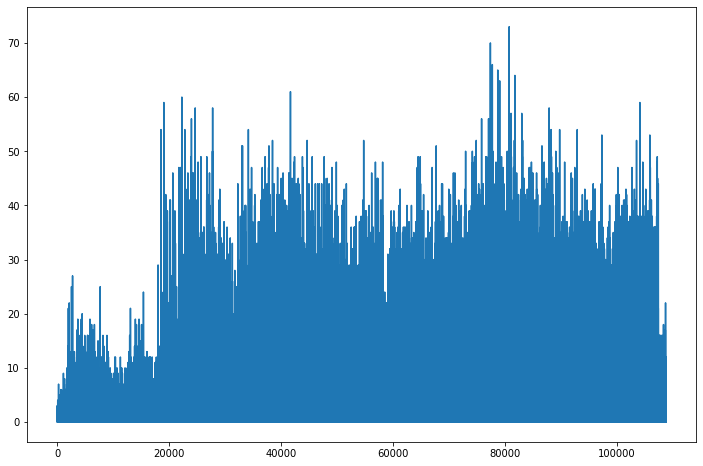

In [134]:
mlb['HR'].plot(figsize=(12,8));

## Graficar utilizando Matplotlib